#   <font color="blue"> Logistic Regression </font>

## 1. 内容回顾


- 线性回归问题是一个简单直观又有精确解的问题(normal equation)。它包含了监督学习所有的要素和流程：对于一个训练集 $\{x^i,y^i\}$,通过最小化 cost fuction $J$ 寻找最优的参数集合 $\{\theta\}$,得到 $y$ 的有效近似，即 hypothesis function $h_\theta(x)$。在后继的课程中，我们会一再引用这个例子来展示监督学习的重要概念比如正则化(Regularization)和推广能力（亦称泛化能力,Generalization)。


- 在上部分内容中，我们用函数拟合的例子来测试基于梯度下降的线性回归算法。在这里，线性回归实际上就是用多项式去拟合训练集。多项式的项数就是输入矢量 $x$ 的特征数。我们首先利用扰动的多项式函数生成训练集 $y^i=f(x^i)+random\ number$,这样我们对训练集就有一个基本的认识，知道大概用多少项的多项式去拟合。我们称之为先验知识(prior knowledge)。而对于非多项式的非线性函数，比如 $\frac{sin(x)}{x}$，我们可以用试探的方法确定输入矢量的特征数。过多特征的引入可以得到更精确的拟合结果，但把随机数的信息也学进去了(过拟合，overfitting)，这是我们需要避免的结果，后面我们会看到，这样会极大的降低 hypothesis function 的推广能力（预测新数据的能力）。


- 在线性回归算法中，<br>
    - hypothesis function 定义为：$$h_\theta(x)=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3+...=\theta^Tx$$ <br>
    - cost function 定义为：$$J=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^i)-y^i)^2$$ <br>
    - 梯度下降算法：<br>

$$\theta_j:=\theta_j-\frac{\alpha}{m}\sum_{i=1}^{m}(h_\theta(x^i)-y^i)x_j^i \quad (\ for\ every\ j\ )$$   


## 2. Logistic Regression

在线性回归算法中，<br>
    - hypothesis function 定义为：$$h_\theta(x)=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3+...=\theta^Tx$$ <br>
    - cost function 定义为：$$J=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^i)-y^i)^2$$ <br>
    - 梯度下降算法：<br>

$$\theta_j:=\theta_j-\frac{\alpha}{m}\sum_{i=1}^{m}(h_\theta(x^i)-y^i)x_j^i \quad (\ for\ every\ j\ )$$   


## 3. 程序和结果

### <font color="red"> 构造归一化的输入矢量</font>
|$x_0$|$x_1$|$x_2$|$x_3$|...|
|-----|-----|-----|-----|---|
|1   |$x$  |$x^2$|$x^3$|...|

In [90]:
clear;
m=30; % 训练样本数
n=2;  % 特征数（输入 x 的分量数）
x0=ones(m,1); % 偏置矢量
xx=x0;
x=sort(rand(m,1));
for i=1:n
fx(:,i)=(x.^i-mean(x.^i))/std(x.^i); % 注意这里的 "."
xx=[xx,fx(:,i)]; % m*(n+1) 的输入矩阵
end

###  <font color="red"> 生成训练样本集</font>
这里采用 $y=a+bx+cx^2$ 加随机数，同学们也可以试试其它非线性函数。比如 $\frac{sin(x)}{x}$。

In [91]:
a=1;b=-2;c=1;rs=0.8; %线性函数的参数，rs 为扰动强度
rx=rand(m,1)-0.5; %均值为 0，方差为 1 的扰动
y=a+b*xx(:,2)+c*xx(:,3)+rs*rx; % 样本数为 m 的训练集

###  <font color="red"> Batch 梯度下降</font>

In [92]:
theta=rand(n+1,1); % 随机指定参数初值
iter=5000;        % 梯度下降迭代次数
alpha=0.05;       % 学习步长
J_history=zeros(iter,1);
%theta_s=theta;
for i=1:iter
%theta(1)=theta(1)-alpha/m*sum(xx*theta_s-y);
%theta(2)=theta(2)-alpha/m*sum((xx*theta_s-y).*xx(:,2));
%theta(3)=theta(3)-alpha/m*sum((xx*theta_s-y).*xx(:,3));
%theta_s=theta;
theta=theta-alpha/m*xx'*(xx*theta-y); % 注意这里的矩阵算式的写法，等价于上面注释掉的语句。自动实现参数同时更新。
J_history(i)=sum((xx*theta-y).^2)/(2*m); % 计算每次迭代的 cost functions,也就是训练误差。
end

###  <font color="red"> 计算结果</font>
* $\theta$  (预设参数为 $a =1$;$b =-2$;$c =1$)

In [93]:
theta

theta =

   0.99149
  -1.87004
   0.80709



* 迭代最后五步的误差(cost function) $J$，已经不发生变化了，但是其值不一定接近 $0$. 这提示我们收敛条件应该设成 cost function 的变化小于某一小值，而不能直接设成 cost function 小于某值。否则容易进入死循环。

In [94]:
J_history(iter-5:iter)

ans =

   0.024862
   0.024862
   0.024862
   0.024862
   0.024862
   0.024862



* 解析结果 （normal equation），与梯度下降法得到的结果一致。

In [95]:
theta2 = pinv( xx' * xx ) * xx' * y  % 一步得到拟合参数
J2=sum((xx*theta2-y).^2/(2*m))       % 误差

theta2 =

   0.99149
  -1.87157
   0.80862

J2 =  0.024862


* 拟合结果可视化

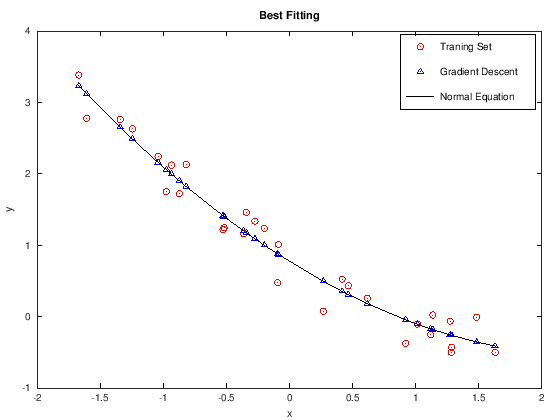

In [96]:
hold on;box on;
plot(xx(:,2),y,"ro;Traning Set;")
plot(xx(:,2),xx*theta,"b^;Gradient Descent;",'MarkerSize',6)
plot(xx(:,2),xx*theta2,"k-;Normal Equation;",'LineWidth',2)
xlabel('x');
ylabel('y');
title('Best Fitting');

## 讨论
线性回归在这类问题上表现不错，但是最大局限是必须事先知道拟合函数（即输入的特征完全确定）。这使线性回归显得不那么智能。如果不告诉你训练集由什么函数生成的，要怎么做呢？有没有办法让机器自动选择输入特征呢？